original shape of data:    (400, 4096)
transformed shape of data using PCA: (400, 204)


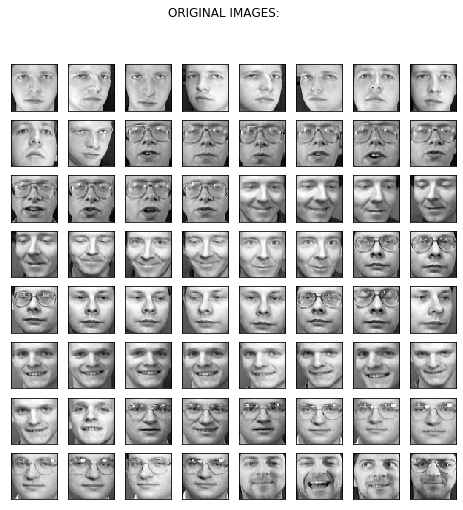

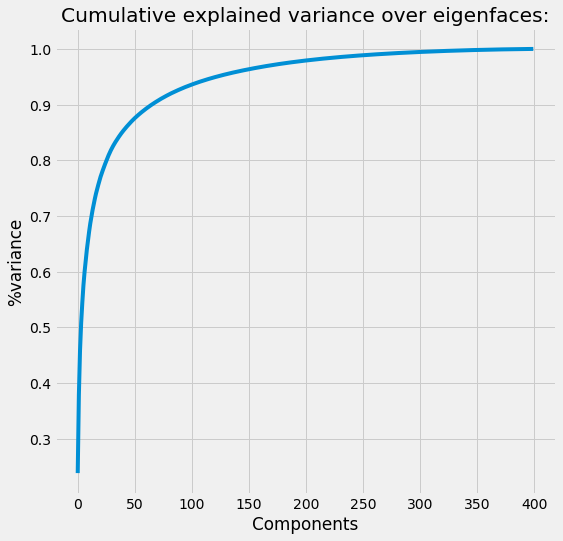

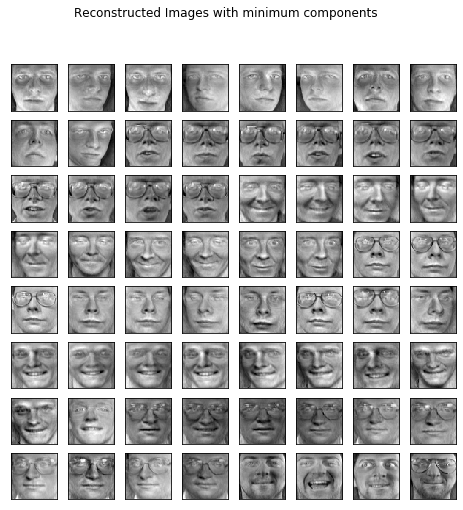

In [35]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from sklearn import decomposition


def components(a):      # creating the function to take out the min feature by analysing the 
                        #variance graph
   b=[]                 # creating the list b to take the components containing max variance
   for i in range(len(a)): 
        if (a[i]<0.98):         # by graph analysis taking features with variance less than 99%
              b.append(a[i])             
   return(b)                  # returning the values to main function
            
# MAIN CODE BEGINS HERE
olive= datasets.olivetti_faces.fetch_olivetti_faces()
data= olive['data']
images=olive['images']
y= olive['target']
samples,H,W= images.shape    # samples are 400 with height and width =64
features= H*W                # 4096 features are available

mean_image=data.mean(axis=0)   # calculating mean value over all faces
data_centered= data-mean_image # global centering

# Plotting the original images on 8*8 grid
fig= plt.figure(figsize=(8,8))       # taking 8*8 grid
plt.suptitle("ORIGINAL IMAGES: ")
for i in range(64):                  # taking 64 images
     plt.subplot(8,8,i+1)            # subplotting 64 images in 8*8 grid
     plt.imshow(np.reshape(images[i],[H,W]),cmap=plt.cm.gray)
     plt.grid(False);
     plt.xticks([]);
     plt.yticks([]);
    
# MODEL BUILDING 
# Applying PCA on images
pca= decomposition.PCA(svd_solver='randomized')  # using random solver
pca.fit(data_centered)  # fitting data to pca model

# Cumulative explained variance over eigenfaces
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(8,8));
    plt.title("Cumulative explained variance over eigenfaces:");
    plt.xlabel("Components");
    plt.ylabel("%variance");
    plt.plot(pca.explained_variance_ratio_.cumsum());
    
a= pca.explained_variance_ratio_.cumsum()    # Taking the variance values in a list


#Reconstructing the faces by selecting min components containing max info
load= components(a)  # calling the function components
n=len(load) # there are 204 pca components showing max variance
pca = decomposition.PCA(n_components=n,svd_solver='randomized')  # applying PCA on these 204 selected components
pca.fit(data_centered)   # fitting the data
data_centered_pca = pca.transform(data_centered)
print("original shape of data:   ", data_centered.shape)             # printing the original data
print("transformed shape of data using PCA:", data_centered_pca.shape)         # printing the pca data with reduced components  

# Applying inverse tansform on PCA data to form images
image_new = pca.inverse_transform(data_centered_pca)
fig= plt.figure(figsize=(8,8))                        # plotting images according to the reduced components
plt.suptitle("Reconstructed Images with minimum components")
for i in range(64):
     plt.subplot(8,8,i+1)
     plt.imshow(np.reshape(image_new[i],[H,W]),cmap=plt.cm.gray)
     plt.grid(False);
     plt.xticks([]);
     plt.yticks([]);


